## Table of contents:
* [Open the files](#open-the-files)
* [Budget cleaning](#Budget-cleaning)
* [Satellite cleaning](#Satellite-cleaning)
* [Crosstables](#Crosstables)
* [Merge datasets](#Merge-datasets)

# Open the files

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.chdir('C:\\Users\\mcoge\\Satellite project')

In [3]:
os.listdir()

['bubble_lat_long.xlsx',
 'budget.xlsx',
 'budget_cleaned.csv',
 'budget_lat_lon.csv',
 'france linear defence.png',
 'france linear.png',
 'france svr defence.jpg',
 'france svr.jpg',
 'satellites.xlsx',
 'satellites_cleaned.csv']

In [4]:
budget=pd.read_excel('budget.xlsx')

In [5]:
satellites=pd.read_excel('satellites.xlsx')

# Budget cleaning

* Drop rows with value = 0 ✅
* Drop rows where currency is different to USD ✅
* application: make it correspond to Application in budget file ✅
* year: ok
* value: ok
* region: can replace NaNs by NorAM ✅
* country and country_code: ok
* program_type: same as operator_status (can ve civil 1/0) ✅
* program_name: ok
* unit: always million (drop it) ✅
* currency: as it's always USD, can be dropped ✅


### Remove the other currencies

In [6]:
budget.head()

,application,year,value,region,country_code,country,program_type,program_name,unit,currency
0,Total,2019,195.432000,Europe,BEL,Belgium,Civil,ESA,million,EUR
1,Total,2020,171.600069,Europe,BEL,Belgium,Civil,ESA,million,EUR
2,Total,2019,220.230630,Europe,BEL,Belgium,Civil,ESA,million,USD
3,Total,2020,193.374633,Europe,BEL,Belgium,Civil,ESA,million,USD
4,Total,2019,54.274739,Europe,AUT,Austria,Civil,ESA,million,EUR


In [7]:
budget.shape

(97458, 10)

In [8]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97458 entries, 0 to 97457
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   application   97458 non-null  object 
 1   year          97458 non-null  int64  
 2   value         97458 non-null  float64
 3   region        95540 non-null  object 
 4   country_code  97458 non-null  object 
 5   country       97458 non-null  object 
 6   program_type  97458 non-null  object 
 7   program_name  97458 non-null  object 
 8   unit          97458 non-null  object 
 9   currency      97458 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.4+ MB


In [9]:
df_budget=budget.query('currency=="USD"').copy()

In [10]:
df_budget.shape

(49224, 10)

In [11]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49224 entries, 2 to 97457
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   application   49224 non-null  object 
 1   year          49224 non-null  int64  
 2   value         49224 non-null  float64
 3   region        48012 non-null  object 
 4   country_code  49224 non-null  object 
 5   country       49224 non-null  object 
 6   program_type  49224 non-null  object 
 7   program_name  49224 non-null  object 
 8   unit          49224 non-null  object 
 9   currency      49224 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.1+ MB


In [12]:
df_budget.nunique()

application       24
year              22
value           7889
region             5
country_code      88
country           88
program_type       2
program_name       4
unit               1
currency           1
dtype: int64

In [13]:
df_budget.isna().sum()

application        0
year               0
value              0
region          1212
country_code       0
country            0
program_type       0
program_name       0
unit               0
currency           0
dtype: int64

In [14]:
df_budget[df_budget.region.isna()]['country'].value_counts()

Canada           706
United States    506
Name: country, dtype: int64

In [15]:
df_budget.region.value_counts()

Europe    20402
MEA        9680
Asia       9218
LATAM      5324
CIS        3388
Name: region, dtype: int64

For the region with NaNs, it's can be filled with North America or `NORAM` to have the same structure than `LATAM`.

In [16]:
df_budget.region.fillna('NORAM', inplace=True)

In [17]:
df_budget.isna().sum()

application     0
year            0
value           0
region          0
country_code    0
country         0
program_type    0
program_name    0
unit            0
currency        0
dtype: int64

### Drop the rows with no budget allocated

In [18]:
df_budget=df_budget[df_budget.value!=0]

In [19]:
df_budget.shape

(9516, 10)

### Modification on Application

In [20]:
df_budget.application.value_counts()

Earth Observation                                1417
Internal operations                              1318
Telecommunications                               1223
Technology                                       1191
Space Science and exploration                     900
Meteorology                                       840
Launch vehicles                                   709
Navigation                                        597
Human Spaceflight                                 482
Space security                                    328
Other                                             293
Total                                              54
USA classified program                             22
European Polar System (EPS)                        22
Early warning                                      22
Meteosat Second Generation (MSG)                   22
Meteosat Transition Program (MTP)                  19
Jason-2&3                                          18
MTG                         

In [21]:
application_change={'European Polar System (EPS)':'Meteorology', 'European Polar System (EPS)':'Meteorology', 
                    'Meteosat Second Generation (MSG)':'Meteorology','GMES':'Meteorology',
                    'Meteosat Transition Program (MTP)':'Meteorology','Jason-2&3':'Meteorology',
                    'MTG':'Meteorology', 'EPS-Second Generation Preparation (EPS-SG PP)':'Meteorology',
                    'Jason-CS':'Meteorology','MSG Extension':'Meteorology'}

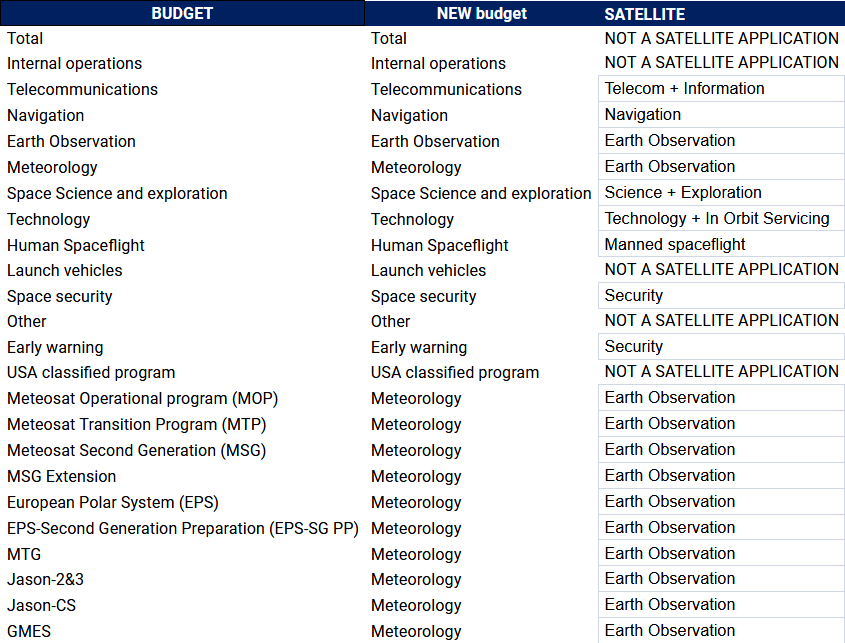

In [22]:
df_budget.application.replace(application_change, inplace=True)

In [23]:
df_budget.application.value_counts()

Earth Observation                1417
Internal operations              1318
Telecommunications               1223
Technology                       1191
Meteorology                       960
Space Science and exploration     900
Launch vehicles                   709
Navigation                        597
Human Spaceflight                 482
Space security                    328
Other                             293
Total                              54
USA classified program             22
Early warning                      22
Name: application, dtype: int64

In [24]:
df_budget.columns

Index(['application', 'year', 'value', 'region', 'country_code', 'country',
       'program_type', 'program_name', 'unit', 'currency'],
      dtype='object')

In [25]:
df_budget.drop(['unit', 'currency'], axis=1, inplace=True)

In [26]:
df_budget=df_budget.reset_index(drop=True)

In [27]:
df_budget

,application,year,value,region,country_code,country,program_type,program_name
0,Total,2019,220.230630,Europe,BEL,Belgium,Civil,ESA
1,Total,2020,193.374633,Europe,BEL,Belgium,Civil,ESA
2,Total,2019,61.161734,Europe,AUT,Austria,Civil,ESA
3,Total,2020,50.245259,Europe,AUT,Austria,Civil,ESA
4,Total,2019,1.513415,Europe,BGR,Bulgaria,Civil,ESA
...,...,...,...,...,...,...,...,...
9511,Meteorology,2020,285.760864,Europe,EUM,Eumetsat,Civil,National program
9512,Meteorology,2020,153.914576,Europe,EUM,Eumetsat,Civil,National program
9513,Meteorology,2020,0.676135,Europe,EUM,Eumetsat,Civil,National program
9514,Meteorology,2020,28.923545,Europe,EUM,Eumetsat,Civil,National program


In [28]:
df_budget.head()

,application,year,value,region,country_code,country,program_type,program_name
0,Total,2019,220.230630,Europe,BEL,Belgium,Civil,ESA
1,Total,2020,193.374633,Europe,BEL,Belgium,Civil,ESA
2,Total,2019,61.161734,Europe,AUT,Austria,Civil,ESA
3,Total,2020,50.245259,Europe,AUT,Austria,Civil,ESA
4,Total,2019,1.513415,Europe,BGR,Bulgaria,Civil,ESA


In [29]:
df_budget[df_budget.value>5000].country.value_counts()

Japan            260
Korea, Rep.      112
United States     45
Pakistan          24
Vietnam           19
Singapore         19
Lao PDR            6
Name: country, dtype: int64

In [30]:
pakistan=budget.query('country=="Pakistan"')

In [31]:
pakistan=pakistan[pakistan.value>0]

In [32]:
pakistan.drop(['unit','program_name', 'program_type','country','country_code', 'region'], axis=1, inplace=True)

In [33]:
pakistan.query('year=="2020"')

,application,year,value,currency
19040,Telecommunications,2020,3.690931e+06,PKR
19042,Earth Observation,2020,8.436413e+05,PKR
19524,Telecommunications,2020,3.500000e+04,USD
19526,Earth Observation,2020,8.000000e+03,USD


### Divide by 1000 the values in Japan, Korea and Taiwan

The currency conversion create a problem due to commas and dots in Excel/Pandas: the budget value of Japan, Korea and Taiwan have been multiplied by 1000. To normalize it, the amount has to be divided by 1000.

In [34]:
print(df_budget.query('country=="Japan"')['value'].max())
print(df_budget.query('country=="Korea, Rep."')['value'].max())
print(df_budget.query('country=="Taiwan"')['value'].max())
print(df_budget.query('country=="Pakistan"')['value'].max())

794753.56114819
216083.0534842354
44.00000000000001
41700.0


In [35]:
df_budget['correction_values']=df_budget.value/1000

In [154]:
df_budget[df_budget['region']=='Asia'].country.value_counts()

Japan          264
India          204
China          199
Australia      149
Korea, Rep.    127
Indonesia       96
Taiwan          79
Thailand        49
Vietnam         42
Malaysia        39
Pakistan        25
Singapore       23
New Zealand     18
Philippines     16
Mongolia        12
Bangladesh       8
Lao PDR          6
Myanmar          3
Cambodia         3
Name: country, dtype: int64

In [37]:
df_budget['value'] = np.where(df_budget['country'] == 'Japan',
                              df_budget['correction_values'], df_budget['value'])
df_budget['value'] = np.where(df_budget['country'] == 'Korea, Rep.'
                               , df_budget['correction_values'], df_budget['value'])
df_budget['value'] = np.where(df_budget['country'] == 'Taiwan',
                               df_budget['correction_values'], df_budget['value'])

In [38]:
print(df_budget.query('country=="Japan"')['value'].max())
print(df_budget.query('country=="Korea, Rep."')['value'].max())
print(df_budget.query('country=="Taiwan"')['value'].max())

794.7535611481901
216.0830534842354
0.044000000000000004


In [39]:
df_budget.head()

,application,year,value,region,country_code,country,program_type,program_name,correction_values
0,Total,2019,220.230630,Europe,BEL,Belgium,Civil,ESA,0.220231
1,Total,2020,193.374633,Europe,BEL,Belgium,Civil,ESA,0.193375
2,Total,2019,61.161734,Europe,AUT,Austria,Civil,ESA,0.061162
3,Total,2020,50.245259,Europe,AUT,Austria,Civil,ESA,0.050245
4,Total,2019,1.513415,Europe,BGR,Bulgaria,Civil,ESA,0.001513


In [40]:
df_budget.drop('correction_values', axis=1, inplace=True)

In [41]:
df_budget.describe().T

,count,mean,std,min,25%,50%,75%,max
year,9516.0,2011.260298,5.857766,1999.000000,2007.000000,2012.000000,2016.000000,2020.0
value,9516.0,320.025738,2842.600403,-0.000071,2.704788,11.287701,63.386876,106000.0


In [42]:
df_budget=df_budget[~(df_budget.value<0)]

In [43]:
df_budget.to_csv('budget_cleaned.csv', index=False)

# Satellite cleaning

In [32]:
satellites.head()

,satellite_Name,Launch year,Launch status,Application,operator_status,operator_query.country,global_regional_distribution,mass_range_kg,price_range_m$
0,DMC-3A,2015,Launched,Earth Observation,Civil,China,Asia,<500 kg,51-200M$
1,DMC-3B,2015,Launched,Earth Observation,Civil,China,Asia,<500 kg,51-200M$
2,DMC-3C,2015,Launched,Earth Observation,Civil,China,Asia,<500 kg,51-200M$
3,SSTL-S1,2018,Launched,Earth Observation,Civil,China,Asia,<500 kg,51-200M$
4,VRSS-1,2012,Launched,Earth Observation,Civil,"Venezuela, RB",Latin America and Caribbean,501-2000 kg,51-200M$


In [33]:
satellites.shape

(2499, 9)

In [34]:
satellites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   satellite_Name                2499 non-null   object
 1   Launch year                   2499 non-null   int64 
 2   Launch status                 2499 non-null   object
 3   Application                   2499 non-null   object
 4   operator_status               2499 non-null   object
 5   operator_query.country        2499 non-null   object
 6   global_regional_distribution  2499 non-null   object
 7   mass_range_kg                 2499 non-null   object
 8   price_range_m$                2499 non-null   object
dtypes: int64(1), object(8)
memory usage: 175.8+ KB


In [35]:
satellites.nunique()

satellite_Name                  2380
Launch year                       20
Launch status                      5
Application                       10
operator_status                    2
operator_query.country            76
global_regional_distribution       6
mass_range_kg                      4
price_range_m$                     5
dtype: int64

In [36]:
satellites.isna().sum()

satellite_Name                  0
Launch year                     0
Launch status                   0
Application                     0
operator_status                 0
operator_query.country          0
global_regional_distribution    0
mass_range_kg                   0
price_range_m$                  0
dtype: int64

**Satellites**

* satellite_Name: unique id (it could be dropped at the end)
* Launch year: ok ✅
* Launch status: encoding 1 to 4 or dummies 
* Application: Encoding 1 to 10 or dummies 
* operator_status: 0 or 1 (can be civil 1/0)
* operator_query.country: seems ok, have to change the name of the column
* global_regional_distribution: change the name of the column
* mass_range_kg: encoding 1 to 4
* price_range: encoding 1 to 5 

In [37]:
satellites['Launch status'].value_counts()

To be launched            1267
Launched                  1147
Launch failure              42
To be Launched              32
Partial launch failure      11
Name: Launch status, dtype: int64

The only change in the `Launch status` is To be launched appears twice because a letter changed. The different element will be replaced and there will only be 4 differents values.


In [38]:
satellites['Launch status'].replace({'To be Launched':'To be launched'}, inplace=True)

In [39]:
satellites['Launch status'].value_counts()

To be launched            1299
Launched                  1147
Launch failure              42
Partial launch failure      11
Name: Launch status, dtype: int64

In [40]:
satellites.head()

,satellite_Name,Launch year,Launch status,Application,operator_status,operator_query.country,global_regional_distribution,mass_range_kg,price_range_m$
0,DMC-3A,2015,Launched,Earth Observation,Civil,China,Asia,<500 kg,51-200M$
1,DMC-3B,2015,Launched,Earth Observation,Civil,China,Asia,<500 kg,51-200M$
2,DMC-3C,2015,Launched,Earth Observation,Civil,China,Asia,<500 kg,51-200M$
3,SSTL-S1,2018,Launched,Earth Observation,Civil,China,Asia,<500 kg,51-200M$
4,VRSS-1,2012,Launched,Earth Observation,Civil,"Venezuela, RB",Latin America and Caribbean,501-2000 kg,51-200M$


In [41]:
satellites.rename({'global_regional_distribution':'region','operator_query.country':'country'}, axis='columns', inplace=True)

In [42]:
satellites.head()

,satellite_Name,Launch year,Launch status,Application,operator_status,country,region,mass_range_kg,price_range_m$
0,DMC-3A,2015,Launched,Earth Observation,Civil,China,Asia,<500 kg,51-200M$
1,DMC-3B,2015,Launched,Earth Observation,Civil,China,Asia,<500 kg,51-200M$
2,DMC-3C,2015,Launched,Earth Observation,Civil,China,Asia,<500 kg,51-200M$
3,SSTL-S1,2018,Launched,Earth Observation,Civil,China,Asia,<500 kg,51-200M$
4,VRSS-1,2012,Launched,Earth Observation,Civil,"Venezuela, RB",Latin America and Caribbean,501-2000 kg,51-200M$


In [43]:
satellites.to_csv('satellites_cleaned.csv', index=False)

# Crosstables

In [44]:
satellites[satellites['Launch status']=='Launch failure'].sort_values(by=['Launch year','satellite_Name'])

,satellite_Name,Launch year,Launch status,Application,operator_status,country,region,mass_range_kg,price_range_m$
1464,Kwangmyungsung-2,2009,Launch failure,Technology,Civil,"Korea, Dem. Rep.",Asia,<500 kg,<50 M$
1382,OCO-1,2009,Launch failure,Earth Observation,Civil,United States,North America,<500 kg,201-500 M$
1288,STSat 2A,2009,Launch failure,Science,Civil,"Korea, Rep.",Asia,<500 kg,<50 M$
1031,GSAT 4,2010,Launch failure,Telecom,Civil,India,Asia,2001-5000 kg,51-200M$
1032,GSAT 5P,2010,Launch failure,Telecom,Civil,India,Asia,2001-5000 kg,51-200M$
1238,Glonass M30,2010,Launch failure,Navigation,Defense,Russian Federation,Russia and Central Asia,501-2000 kg,51-200M$
1239,Glonass M31,2010,Launch failure,Navigation,Defense,Russian Federation,Russia and Central Asia,501-2000 kg,51-200M$
1240,Glonass M32,2010,Launch failure,Navigation,Defense,Russian Federation,Russia and Central Asia,501-2000 kg,51-200M$
1289,STSat 2B,2010,Launch failure,Science,Civil,"Korea, Rep.",Asia,<500 kg,<50 M$
1990,Express AM4,2011,Launch failure,Telecom,Civil,Russian Federation,Russia and Central Asia,>5000 kg,201-500 M$


In [45]:
satellites[satellites['satellite_Name'].str.contains('Telkom')].sort_values(by=['Launch year', 'satellite_Name'])

,satellite_Name,Launch year,Launch status,Application,operator_status,country,region,mass_range_kg,price_range_m$
2119,Telkom 3,2012,Launch failure,Telecom,Civil,Indonesia,Asia,501-2000 kg,201-500 M$
2120,Telkom 3S,2017,Launched,Telecom,Civil,Indonesia,Asia,2001-5000 kg,201-500 M$
2121,Telkom 4 (Merah Putih),2018,Launched,Telecom,Civil,Indonesia,Asia,>5000 kg,201-500 M$


In [46]:
satellites[satellites['Launch status']=='Launch failure'].groupby(['region', 'operator_status']).agg(['count'])

satellite_Name Launch year  \
                                                     count       count   
region                      operator_status                              
Asia                        Civil                       12          12   
                            Defense                      1           1   
Latin America and Caribbean Civil                        2           2   
Middle East and Africa      Civil                        4           4   
North America               Civil                        2           2   
Russia and Central Asia     Civil                       11          11   
                            Defense                     10          10   

                                            Launch status Application country  \
                                                    count       count   count   
region                      operator_status                                     
Asia                        Civil                      12          12      12   
                            Defense                     1           1       1   
Latin America and Caribbean Civil                       2           2       2   
Middle East and Africa      Civil                       4           4       4   
North America               Civil                       2           2       2   
Russia and Central Asia     Civil                      11          11      11   
                            Defense                    10          10      10   

                                            mass_range_kg price_range_m$  
                                                    count          count  
region                      operator_status                               
Asia                        Civil                      12             12  
                            Defense                     1              1  
Latin America and Caribbean Civil                       2              2  
Middle East and Africa      Civil                       4              4  
North America               Civil                       2              2  
Russia and Central Asia     Civil                      11             11  
                            Defense                    10             10

In [47]:
satellites[satellites['Launch status']=='Launch failure'].groupby(['country','Launch year']).agg(['count'])

satellite_Name Launch status Application  \
                                        count         count       count   
country            Launch year                                            
Brazil             2013                     1             1           1   
China              2011                     2             2           2   
                   2016                     1             1           1   
                   2017                     1             1           1   
                   2019                     1             1           1   
India              2010                     2             2           2   
                   2017                     1             1           1   
Indonesia          2012                     1             1           1   
Iran, Islamic Rep. 2012                     2             2           2   
                   2019                     2             2           2   
Korea, Dem. Rep.   2009                     1             1           1   
                   2012                     1             1           1   
Korea, Rep.        2009                     1             1           1   
                   2010                     1             1           1   
Mexico             2015                     1             1           1   
Russian Federation 2010                     3             3           3   
                   2011                     4             4           4   
                   2012                     1             1           1   
                   2013                     6             6           6   
                   2014                     1             1           1   
                   2015                     2             2           2   
                   2016                     1             1           1   
                   2017                     2             2           2   
                   2018                     1             1           1   
United States      2009                     1             1           1   
                   2011                     1             1           1   

                               operator_status region mass_range_kg  \
                                         count  count         count   
country            Launch year                                        
Brazil             2013                      1      1             1   
China              2011                      2      2             2   
                   2016                      1      1             1   
                   2017                      1      1             1   
                   2019                      1      1             1   
India              2010                      2      2             2   
                   2017                      1      1             1   
Indonesia          2012                      1      1             1   
Iran, Islamic Rep. 2012                      2      2             2   
                   2019                      2      2             2   
Korea, Dem. Rep.   2009                      1      1             1   
                   2012                      1      1             1   
Korea, Rep.        2009                      1      1             1   
                   2010                      1      1             1   
Mexico             2015                      1      1             1   
Russian Federation 2010                      3      3             3   
                   2011                      4      4             4   
                   2012                      1      1             1   
                   2013                      6      6             6   
                   2014                      1      1             1   
                   2015                      2      2             2   
                   2016                      1      1             1   
                   2017                      2      2             2   
         

In [48]:
satellites[satellites['Launch status']=='Launch failure'].groupby(['mass_range_kg','price_range_m$']).agg(['count'])

satellite_Name Launch year Launch status  \
                                      count       count         count   
mass_range_kg price_range_m$                                            
2001-5000 kg  51-200M$                    3           3             3   
501-2000 kg   201-500 M$                  3           3             3   
              51-200M$                    9           9             9   
              <50 M$                      2           2             2   
<500 kg       201-500 M$                  1           1             1   
              <50 M$                     15          15            15   
>5000 kg      201-500 M$                  3           3             3   
              >500 M$                     2           2             2   
              TBD                         4           4             4   

                             Application operator_status country region  
                                   count           count   count  count  
mass_range_kg price_range_m$                                             
2001-5000 kg  51-200M$                 3               3       3      3  
501-2000 kg   201-500 M$               3               3       3      3  
              51-200M$                 9               9       9      9  
              <50 M$                   2               2       2      2  
<500 kg       201-500 M$               1               1       1      1  
              <50 M$                  15              15      15     15  
>5000 kg      201-500 M$               3               3       3      3  
              >500 M$                  2               2       2      2  
              TBD                      4               4       4      4

In [49]:
satellites[satellites['Launch status']=='Partial launch failure'].groupby(['mass_range_kg','price_range_m$']).agg(['count'])
      

satellite_Name Launch year Launch status  \
                                      count       count         count   
mass_range_kg price_range_m$                                            
2001-5000 kg  201-500 M$                  2           2             2   
501-2000 kg   51-200M$                    3           3             3   
              <50 M$                      2           2             2   
<500 kg       51-200M$                    1           1             1   
              <50 M$                      2           2             2   
>5000 kg      201-500 M$                  1           1             1   

                             Application operator_status country region  
                                   count           count   count  count  
mass_range_kg price_range_m$                                             
2001-5000 kg  201-500 M$               2               2       2      2  
501-2000 kg   51-200M$                 3               3       3      3  
              <50 M$                   2               2       2      2  
<500 kg       51-200M$                 1               1       1      1  
              <50 M$                   2               2       2      2  
>5000 kg      201-500 M$               1               1       1      1

In [50]:
satellites.pivot_table(index=['region'], columns=['Application'],values='Launch year', aggfunc="count", fill_value=0)

Application,Earth Observation,Exploration,In Orbit Servicing,Information,Manned spaceflight,Navigation,Science,Security,Technology,Telecom
region,,,,,,,,,,
Asia,346,38,0,137,41,85,34,78,60,348
Europe,92,15,0,1,5,64,18,38,13,21
Latin America and Caribbean,25,0,0,0,0,0,1,0,4,15
Middle East and Africa,53,1,0,3,0,0,0,0,9,27
North America,80,20,1,1,20,35,31,114,66,58
Russia and Central Asia,109,10,0,6,117,67,20,23,11,138


In [51]:
satellites.pivot_table(index=['region'], columns=['Launch year'],values='satellite_Name', aggfunc="count", fill_value=0, margins=True).T

region,Asia,Europe,Latin America and Caribbean,Middle East and Africa,North America,Russia and Central Asia,All
Launch year,,,,,,,
2009,19,11,0,2,22,28,82
2010,27,6,0,3,13,26,75
2011,29,8,2,5,18,27,89
2012,33,9,2,5,13,19,81
2013,32,6,2,1,18,31,90
2014,33,6,2,4,17,38,100
2015,35,11,3,2,16,27,94
2016,42,12,1,4,12,15,86
2017,35,8,2,4,12,17,78


In [52]:
satellites_eu=satellites[satellites.region=='Europe']

In [53]:
satellites_eu.pivot_table(index=['country'], columns=['Launch year'],values='satellite_Name', aggfunc="count", fill_value=0, margins=True).T

country,ESA,Eumetsat,European Union,France,Germany,Italy,Luxembourg,Other Western Europe,Poland,Slovenia,Spain,Sweden,United Kingdom,All
Launch year,,,,,,,,,,,,,,
2009,5,0,0,3,1,1,0,0,0,0,0,0,1,11
2010,1,0,0,1,2,1,0,0,0,0,0,1,0,6
2011,1,0,2,5,0,0,0,0,0,0,0,0,0,8
2012,1,2,2,1,1,1,0,0,0,0,0,0,1,9
2013,6,0,0,0,0,0,0,0,0,0,0,0,0,6
2014,1,0,3,1,0,0,0,0,0,0,0,0,1,6
2015,2,1,7,0,0,1,0,0,0,0,0,0,0,11
2016,2,0,8,1,1,0,0,0,0,0,0,0,0,12
2017,0,0,6,0,1,1,0,0,0,0,0,0,0,8


# Merge datasets

In [54]:
df_budget.head()

,application,year,value,region,country_code,country,program_type,program_name
0,Total,2019,220.230630,Europe,BEL,Belgium,Civil,ESA
1,Total,2020,193.374633,Europe,BEL,Belgium,Civil,ESA
2,Total,2019,61.161734,Europe,AUT,Austria,Civil,ESA
3,Total,2020,50.245259,Europe,AUT,Austria,Civil,ESA
4,Total,2019,1.513415,Europe,BGR,Bulgaria,Civil,ESA


In [55]:
satellites.head()

,satellite_Name,Launch year,Launch status,Application,operator_status,country,region,mass_range_kg,price_range_m$
0,DMC-3A,2015,Launched,Earth Observation,Civil,China,Asia,<500 kg,51-200M$
1,DMC-3B,2015,Launched,Earth Observation,Civil,China,Asia,<500 kg,51-200M$
2,DMC-3C,2015,Launched,Earth Observation,Civil,China,Asia,<500 kg,51-200M$
3,SSTL-S1,2018,Launched,Earth Observation,Civil,China,Asia,<500 kg,51-200M$
4,VRSS-1,2012,Launched,Earth Observation,Civil,"Venezuela, RB",Latin America and Caribbean,501-2000 kg,51-200M$
